In [2]:
import torch
import torch.nn as nn

# Create a 1D input tensor with 1 channel and a length of 6
input_tensor = torch.tensor([[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]]).unsqueeze(0)

# Define a Conv1d layer
conv1d_layer = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, stride=1)

# Manually set the weights and bias for the Conv1d layer
with torch.no_grad():  # Disable gradients for manual weight setting
    conv1d_layer.weight = torch.nn.Parameter(torch.tensor([[[0.5, 1.0, -0.5]]]))  # 1 output, 1 input, kernel size of 3
    conv1d_layer.bias = torch.nn.Parameter(torch.tensor([0.0]))  # Set bias to 0 for simplicity

# Apply the Conv1d layer to the input tensor
output_tensor = conv1d_layer(input_tensor)

print("Input tensor:", input_tensor)
print("Manual weights:", conv1d_layer.weight)
print("Output tensor:", output_tensor)


Input tensor: tensor([[[1., 2., 3., 4., 5., 6.]]])
Manual weights: Parameter containing:
tensor([[[ 0.5000,  1.0000, -0.5000]]], requires_grad=True)
Output tensor: tensor([[[1., 2., 3., 4.]]], grad_fn=<ConvolutionBackward0>)


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

class CNN1D(nn.Module):
    def __init__(self, input_size, kernel_size=3, padding=0, dilation=1, stride=1):
        super(CNN1D, self).__init__()
        # 1D Convolution layer with arbitrary padding, dilation, and stride
        self.conv1d = nn.Conv1d(in_channels=1, out_channels=1, 
                                kernel_size=kernel_size, 
                                padding=padding, 
                                dilation=dilation, 
                                stride=stride)
        self.kernel_size = kernel_size
        self.padding = padding
        self.dilation = dilation
        self.stride = stride
    
    def forward(self, x):
        # Pass through the Conv1d layer
        x = self.conv1d(x)
        x = torch.relu(x)
        
        # Dynamically calculate the flattened size
        batch_size = x.size(0)  # Get the batch size
        output_size = x.size(1) * x.size(2)  # Flatten the output: channels * output length
        
        # Define the fully connected layer dynamically based on the conv output size
        self.fc = nn.Linear(output_size, 1).to(x.device)
        
        # Flatten and pass through the fully connected layer
        x = x.view(batch_size, -1)  # Flatten
        x = self.fc(x)
        return x

# Sample input with batch size=1, channels=1, and arbitrary length of 6
input_data = torch.tensor([[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]]).unsqueeze(0)

# Initialize model with arbitrary kernel size, padding, dilation, and stride
input_size = 6
kernel_size = 3
padding = 1
dilation = 1
stride = 2

model = CNN1D(input_size=input_size, kernel_size=kernel_size, padding=padding, dilation=dilation, stride=stride)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Sample target for training (for demonstration purposes)
target = torch.tensor([[1.0]])

# Forward pass and training loop
output = model(input_data)
print("Output:", output)

loss = criterion(output, target)
print("Loss:", loss.item())

optimizer.zero_grad()
loss.backward()
optimizer.step()


Output: tensor([[-0.2237]], grad_fn=<AddmmBackward0>)
Loss: 1.4973320960998535


##### You can create a model using nn.Sequential to simplify the structure.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

# Hyperparameters
input_size = 6  # Length of the input
kernel_size = 3  # Size of the convolution kernel
padding = 1      # Amount of padding
dilation = 1     # Dilation rate
stride = 2       # Stride length

# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Conv1d(in_channels=1, out_channels=1, kernel_size=kernel_size, 
              padding=padding, dilation=dilation, stride=stride),
    nn.ReLU(),
    nn.Flatten(),  # Flatten the output for the fully connected layer
    nn.Linear(1 * ((input_size + 2 * padding - dilation * (kernel_size - 1) - 1) // stride + 1), 1)  # Linear layer
)

# Sample input with batch size=1, channels=1, and arbitrary length of 6
input_data = torch.tensor([[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]]).unsqueeze(0)  # Shape (1, 1, 6)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Sample target for training (for demonstration purposes)
target = torch.tensor([[1.0]])

# Forward pass
output = model(input_data)
print("Output:", output)

# Compute loss
loss = criterion(output, target)
print("Loss:", loss.item())

# Backward pass and optimization step
optimizer.zero_grad()
loss.backward()
optimizer.step()


Output: tensor([[0.7440]], grad_fn=<AddmmBackward0>)
Loss: 0.06554926931858063


### Simple Synthetic Dataset Example


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Data generation function (using numpy)
def generate_data_numpy(num_samples, input_size):
    X = []
    y = []
    for _ in range(num_samples):
        input_array = np.random.rand(input_size) * 10  # Generate random values between 0 and 10
        target_value = input_array.sum()  # Sum of the input values
        X.append(input_array)
        y.append(target_value)
    return np.array(X), np.array(y).reshape(-1, 1)  # Ensure y is 2D

# Hyperparameters
input_size = 6  # Length of the input
kernel_size = 3  # Size of the convolution kernel
padding = 1      # Amount of padding
dilation = 1     # Dilation rate
stride = 2       # Stride length
num_samples = 1000  # Number of samples in the dataset
batch_size = 16
num_epochs = 50

# Generate dataset
X, y = generate_data_numpy(num_samples, input_size)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create TensorDataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


Epoch [1/50], Train Loss: 441.7609, Test Loss: 180.0632
Epoch [2/50], Train Loss: 103.5450, Test Loss: 73.2217
Epoch [3/50], Train Loss: 58.9151, Test Loss: 58.3675
Epoch [4/50], Train Loss: 52.8584, Test Loss: 55.8919
Epoch [5/50], Train Loss: 51.9484, Test Loss: 55.2417
Epoch [6/50], Train Loss: 51.8035, Test Loss: 55.1256
Epoch [7/50], Train Loss: 51.8215, Test Loss: 55.1334
Epoch [8/50], Train Loss: 51.8051, Test Loss: 55.1150
Epoch [9/50], Train Loss: 51.8047, Test Loss: 55.1172
Epoch [10/50], Train Loss: 51.8047, Test Loss: 55.1176
Epoch [11/50], Train Loss: 51.8007, Test Loss: 55.0835
Epoch [12/50], Train Loss: 51.8394, Test Loss: 55.0865
Epoch [13/50], Train Loss: 51.8211, Test Loss: 55.1065
Epoch [14/50], Train Loss: 51.8346, Test Loss: 55.1070
Epoch [15/50], Train Loss: 51.8126, Test Loss: 55.1239
Epoch [16/50], Train Loss: 51.8059, Test Loss: 55.1222
Epoch [17/50], Train Loss: 51.8306, Test Loss: 55.1392
Epoch [18/50], Train Loss: 51.8154, Test Loss: 55.1366
Epoch [19/50], T

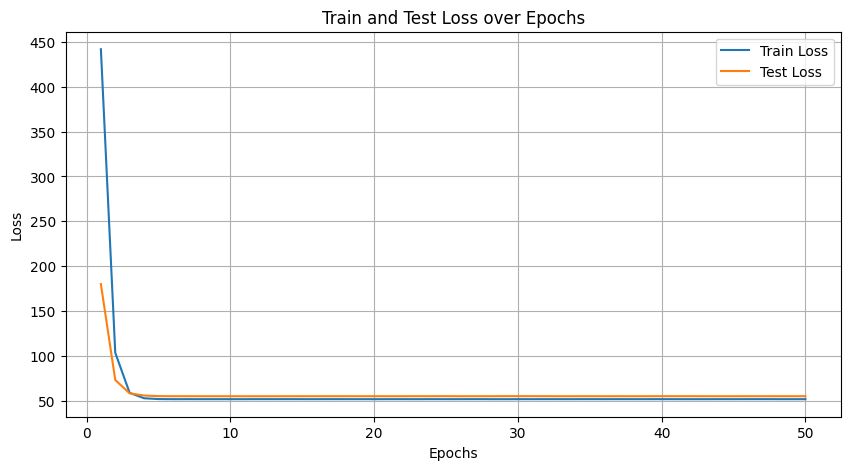

In [5]:

# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Conv1d(in_channels=1, out_channels=1, kernel_size=kernel_size, 
              padding=padding, dilation=dilation, stride=stride),
    nn.ReLU(),
    nn.Flatten(),  # Flatten the output for the fully connected layer
    nn.Linear(1 * ((input_size + 2 * padding - dilation * (kernel_size - 1) - 1) // stride + 1), 1)  # Linear layer
)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Lists to store losses for plotting
train_losses = []
test_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch_X.size(0)  # Multiply by batch size to accumulate total loss
    
    # Average training loss for the epoch
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor).item()
    
    test_losses.append(test_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Plot the training and testing loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


### Modifing your model to include a pooling layer:

Epoch [1/50], Train Loss: 445.4559, Test Loss: 164.4249
Epoch [2/50], Train Loss: 106.5845, Test Loss: 60.1941
Epoch [3/50], Train Loss: 58.4580, Test Loss: 47.0981
Epoch [4/50], Train Loss: 52.1495, Test Loss: 45.8898
Epoch [5/50], Train Loss: 51.3674, Test Loss: 45.8419
Epoch [6/50], Train Loss: 51.2454, Test Loss: 45.8947
Epoch [7/50], Train Loss: 51.1843, Test Loss: 45.9542
Epoch [8/50], Train Loss: 51.1673, Test Loss: 45.8860
Epoch [9/50], Train Loss: 51.1968, Test Loss: 45.8804
Epoch [10/50], Train Loss: 51.2180, Test Loss: 45.9370
Epoch [11/50], Train Loss: 51.1915, Test Loss: 45.9166
Epoch [12/50], Train Loss: 51.1852, Test Loss: 46.0052
Epoch [13/50], Train Loss: 51.2025, Test Loss: 46.0065
Epoch [14/50], Train Loss: 51.1912, Test Loss: 45.9486
Epoch [15/50], Train Loss: 51.1807, Test Loss: 45.9138
Epoch [16/50], Train Loss: 51.1938, Test Loss: 45.9184
Epoch [17/50], Train Loss: 51.1855, Test Loss: 45.9367
Epoch [18/50], Train Loss: 51.1893, Test Loss: 45.9475
Epoch [19/50], T

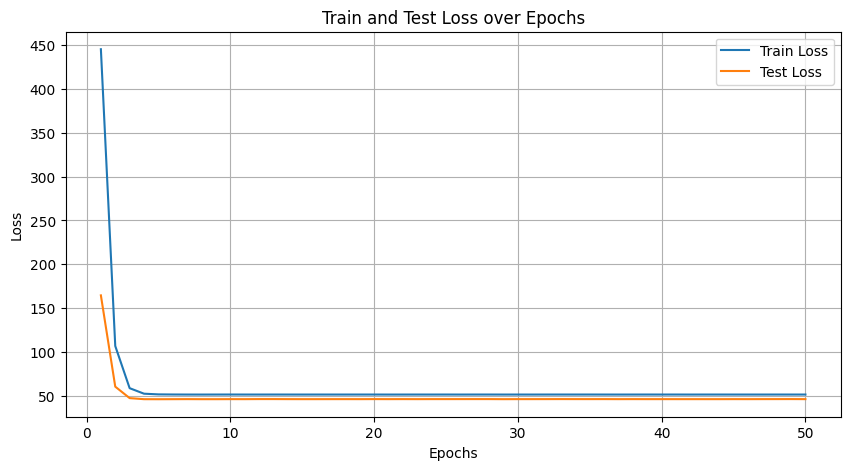

In [8]:

pool_size = 2    # Pooling kernel size

# Define the model using nn.Sequential with a MaxPooling layer
model = nn.Sequential(
    nn.Conv1d(in_channels=1, out_channels=1, kernel_size=kernel_size, 
              padding=padding, dilation=dilation, stride=stride),
    nn.ReLU(),
    nn.MaxPool1d(kernel_size=pool_size, stride=pool_size),  # Add a MaxPooling layer
    nn.Flatten(),  # Flatten the output for the fully connected layer
    nn.Linear(1 * (((input_size + 2 * padding - dilation * (kernel_size - 1) - 1) // stride + 1) // pool_size), 1)  # Linear layer
)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Lists to store losses for plotting
train_losses = []
test_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch_X.size(0)  # Multiply by batch size to accumulate total loss
    
    # Average training loss for the epoch
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor).item()
    
    test_losses.append(test_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Plot the training and testing loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


### Model with Dropout:


In [9]:
# Define the model using nn.Sequential with MaxPooling and Dropout layers
model = nn.Sequential(
    nn.Conv1d(in_channels=1, out_channels=1, kernel_size=kernel_size, 
              padding=padding, dilation=dilation, stride=stride),
    nn.ReLU(),
    nn.MaxPool1d(kernel_size=pool_size, stride=pool_size),  # MaxPooling layer
    nn.Dropout(p=0.5),  # Dropout layer with a 50% drop rate
    nn.Flatten(),  # Flatten the output for the fully connected layer
    nn.Linear(1 * (((input_size + 2 * padding - dilation * (kernel_size - 1) - 1) // stride + 1) // pool_size), 1)  # Linear layer
)
